# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed May  4 11:40:22 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## Code

## LT and shape 

In [8]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2, x0 = 0.05, y0 = -0.05)
df

,dtime,x,y,energy
0,0.654404,-0.014954,-0.038786,35.340821
1,0.433601,-0.170800,0.217232,37.927015
2,0.616620,-0.060770,-0.065391,39.193052
3,0.507609,0.397114,-0.081663,36.437988
4,0.920261,0.140745,-0.197030,38.894822
...,...,...,...,...
75430,0.223091,-0.071011,-0.391190,37.252862
75431,0.173549,0.109221,0.026354,40.476133
75432,0.702350,0.412951,0.055711,34.196233
75433,0.700838,0.348807,-0.111190,38.781626


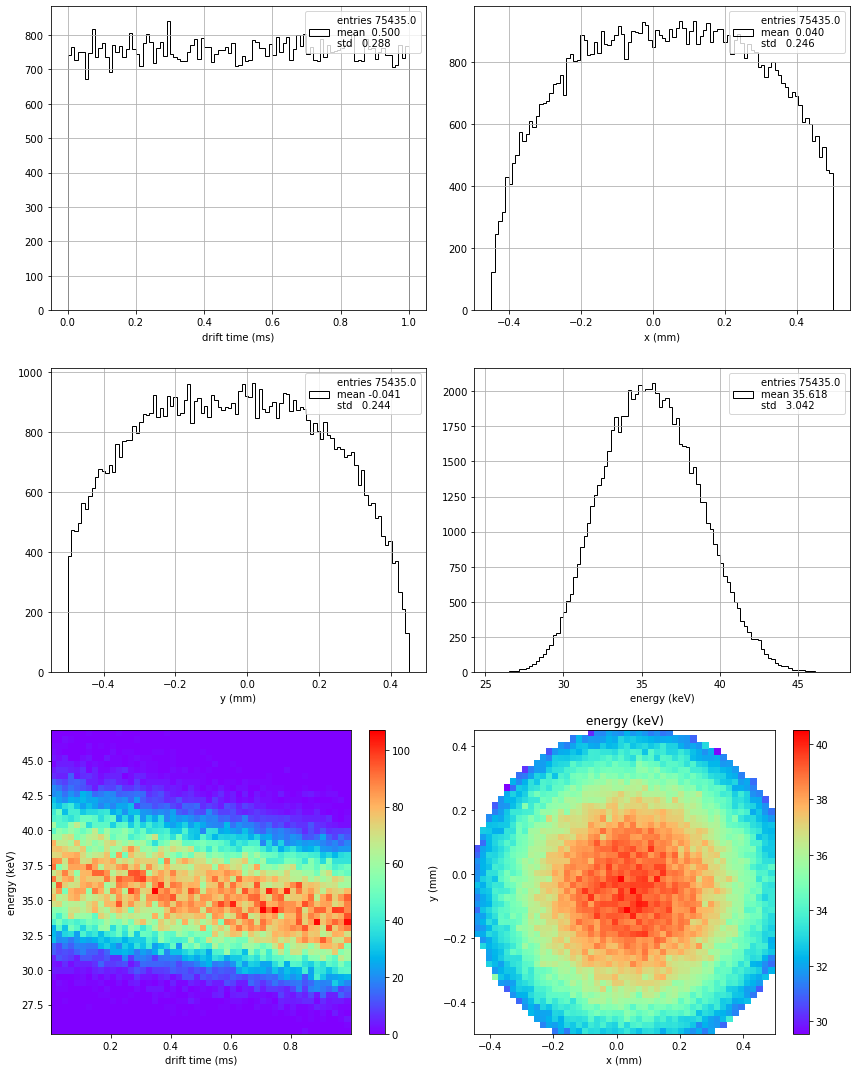

In [9]:
krana.plot_data(df, 50)

In [10]:
coors  = df.x, df.y
energy = df.energy
dtime  = df.dtime
counts_min = 10
grain  = 2
krmap  = krana.krmap(coors, dtime, energy, bins = (18 * grain, 18 * grain), counts_min = counts_min, dt0 = 0.)

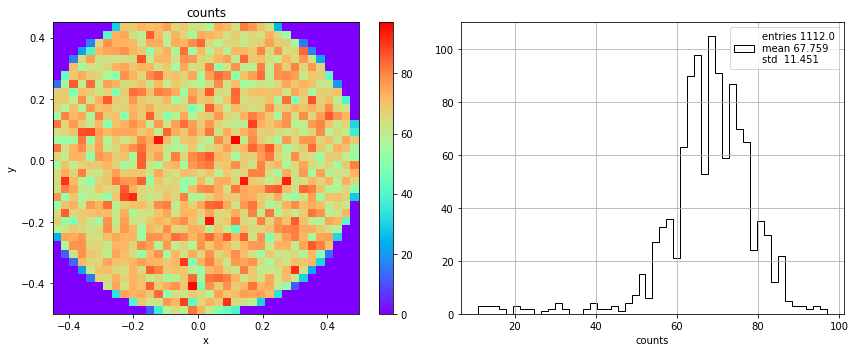

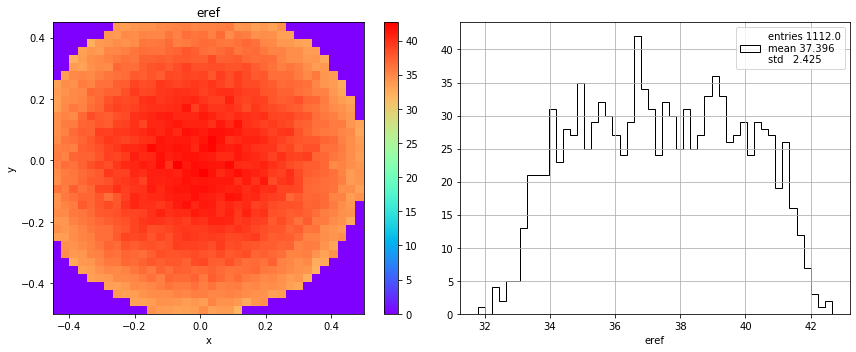

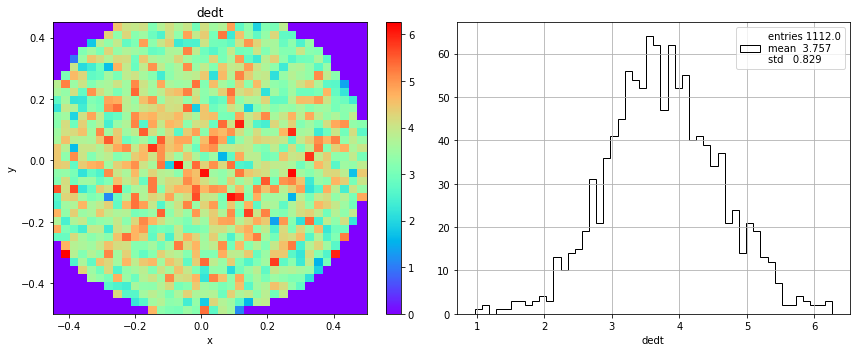

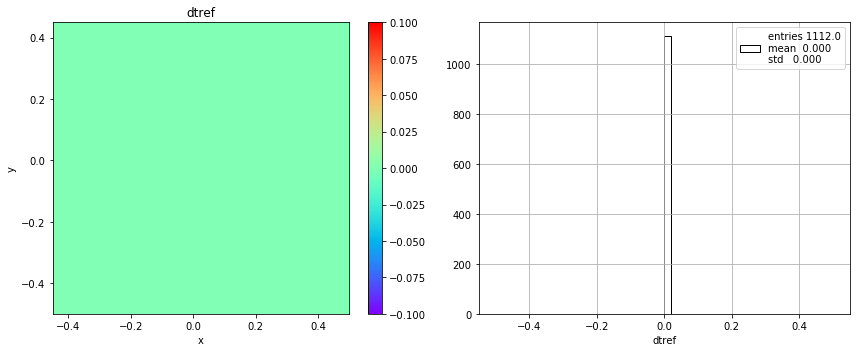

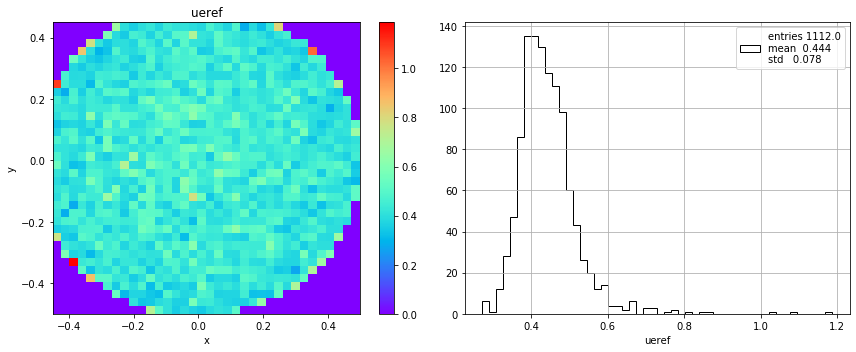

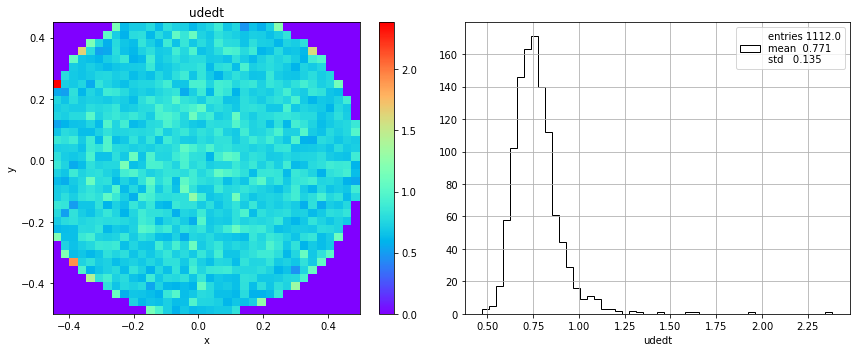

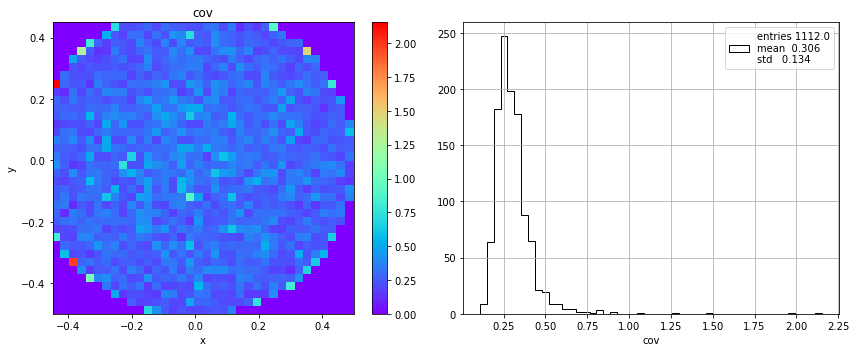

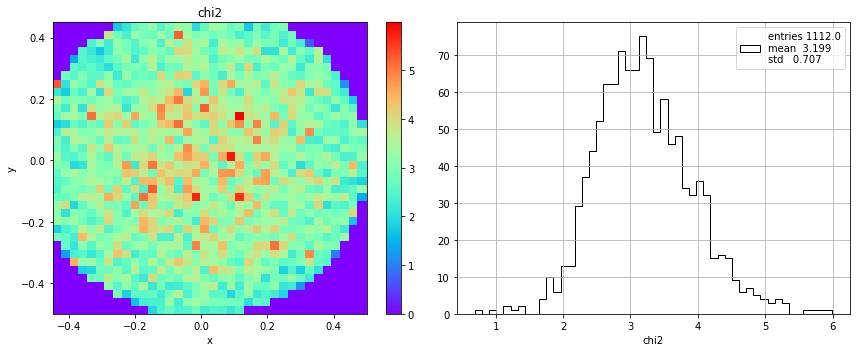

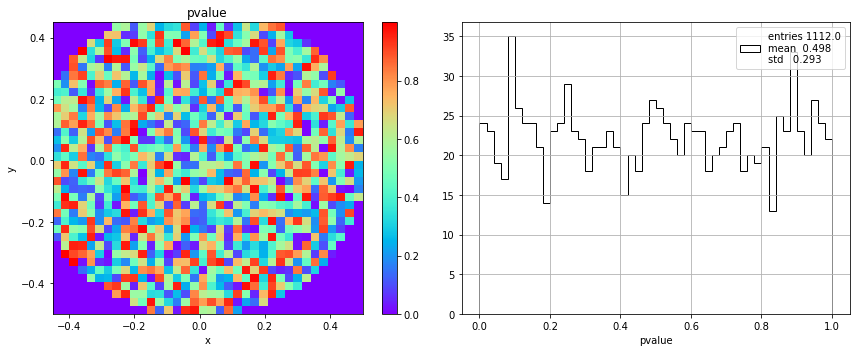

In [11]:
prof.plot_profile(krmap, stats = ('counts', 'eref', 'dedt', 'dtref', 'ueref', 'udedt', 'cov', 'chi2', 'pvalue'));

### correction

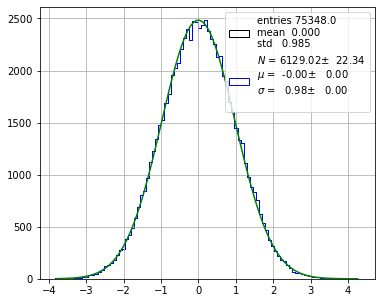

In [15]:
pltext.canvas(1, 1);
xsel = krmap.residuals > -9999.
pltext.hist(krmap.residuals[xsel], 100);
pltext.hfit(krmap.residuals[xsel], 100, fun = 'gaus');

In [16]:
corenergy, _ = krana.krmap_scale(coors, dtime, energy, krmap, scale = 41.5)

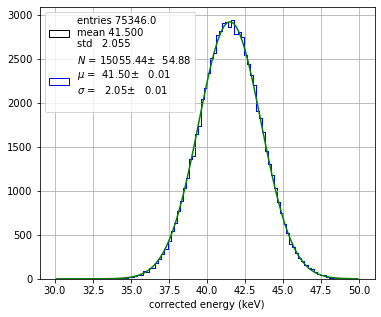

In [17]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100, (30., 50.));
pltext.hfit(corenergy, 100, fun = 'gaus', range = (30., 50.));
plt.xlabel('corrected energy (keV)');

### Validate correction

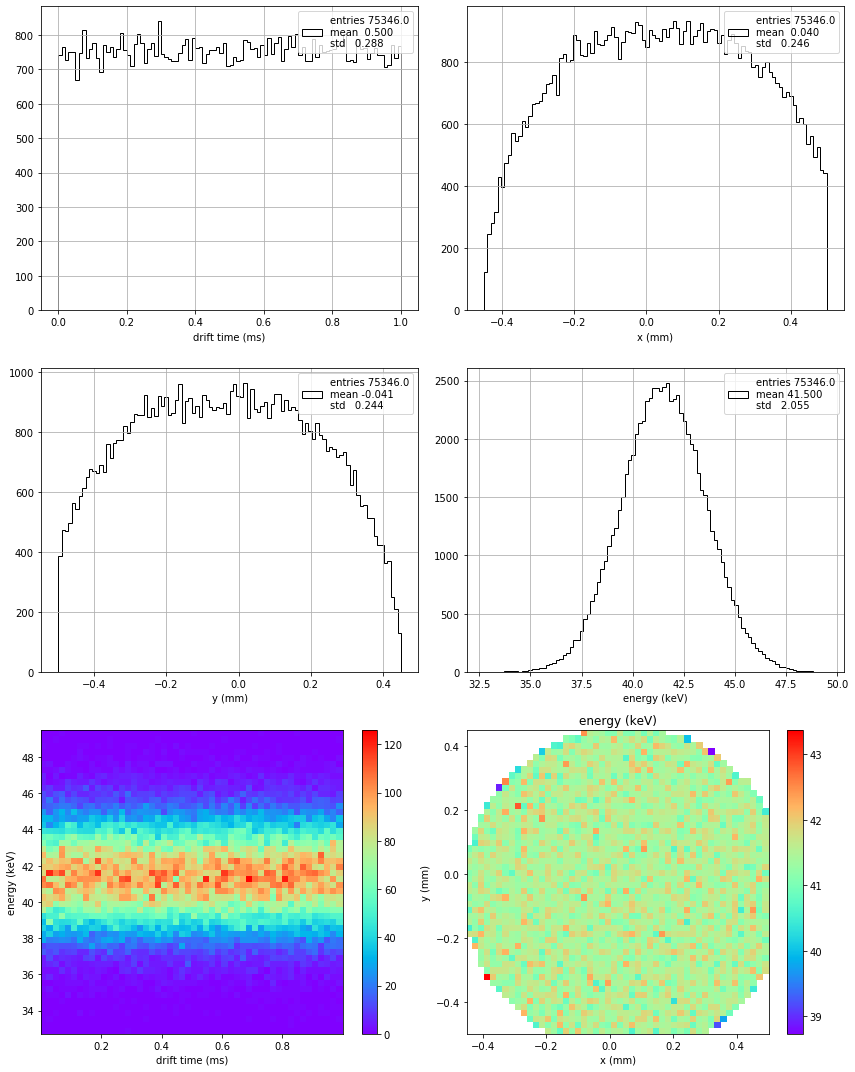

In [18]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
xsel = ut.in_range(corenergy, (30, 50))
krana.plot_data(xdf[xsel], 50)

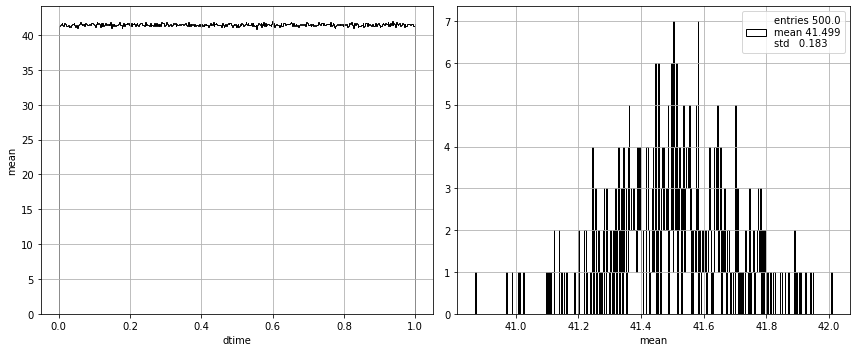

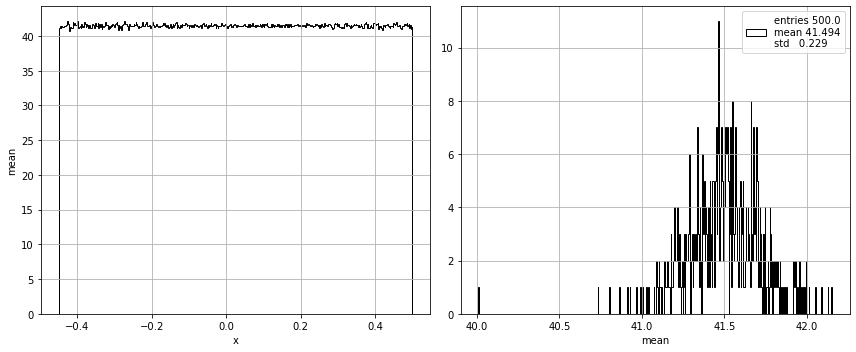

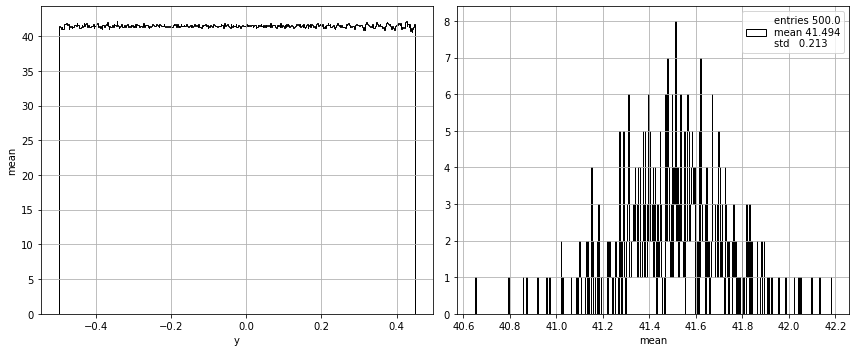

In [19]:
krana.plot_xydt_energy_profiles(xdf[xsel], nbins = 500)